In [1]:
# Pruebas para la media movil python

In [4]:
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url ="https://www.alphavantage.co/query"

params = {
    "function":"TIME_SERIES_DAILY_ADJUSTED",
    "symbol": "AAPL",
    "apikey": "TU10HCWDTV5CNVBN"
}

response = requests.get(url, params=params)
data = response.json()

def convert_response(d):
    for dt, prec in d['Time Series (Daily)'].items():
        r = {'datetime': dt}
        r.update(prec)
        yield r

df = pd.DataFrame(convert_response(data))
# rename the columns    
df = df.rename(columns={ '1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. adjusted close': 'AdjClose', '6. volume': 'Volume'})
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
# extract the columns you want
df = df[[ 'Close']]
df.head()



,Close
datetime,
2018-06-20,186.5000
2018-06-21,185.4600
2018-06-22,184.9200
2018-06-25,182.1700
2018-06-26,184.4300


In [147]:
df.dropna(inplace=True)
df.index = pd.to_datetime(df.index)
df['6-SMA']=df['Close'].rolling(window=6).mean()
df['12-SMA']=df['Close'].rolling(window=12).mean()

In [148]:
df.head()

,Open,High,Low,Close,AdjClose,Volume,6-SMA,12-SMA
datetime,,,,,,,,
2018-05-09,186.5500,187.4000,185.2200,187.3600,185.9833,23211241,NaN,NaN
2018-05-10,187.7400,190.3700,187.6500,190.0400,188.6437,27989289,NaN,NaN
2018-05-11,189.4900,190.0600,187.4500,188.5900,187.9289,26212221,NaN,NaN
2018-05-14,189.0100,189.5300,187.8600,188.1500,187.4905,20778772,NaN,NaN
2018-05-15,186.7800,187.0700,185.1000,186.4400,185.7865,23695159,NaN,NaN


In [149]:
df.tail()

,Open,High,Low,Close,AdjClose,Volume,6-SMA,12-SMA
datetime,,,,,,,,
2018-09-24,216.8200,221.2600,216.6300,220.7900,220.7900,27693358,218.828333,220.647500
2018-09-25,219.7500,222.8200,219.7000,222.1900,222.1900,24554379,219.546667,220.721667
2018-09-26,221.0000,223.7500,219.7600,220.4200,220.4200,23984706,219.910000,220.895833
2018-09-27,223.8200,226.4400,223.5400,224.9500,224.9500,30181227,221.006667,220.987500
2018-09-28,224.7900,225.8400,224.0200,225.7400,225.7400,22929364,221.958333,221.376667


"\nax = plt.gca()\ndf.plot(kind='line', x='datetime', y='Close', ax=ax)\nplt.show()\n"

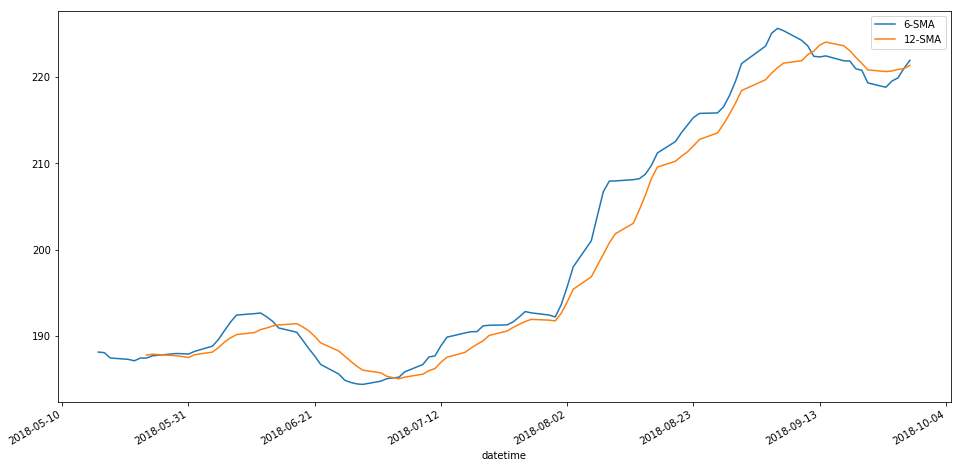

In [150]:
df.plot(figsize=(16,8))
"""
ax = plt.gca()
df.plot(kind='line', x='datetime', y='Close', ax=ax)
plt.show()
"""

In [2]:
# aqui inicia el arima 

In [5]:
df.describe().transpose()

,count,unique,top,freq
Close,100,99,226.8700,2


In [10]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [14]:
model = sm.tsa.statespace.SARIMAX(df['Close'].astype(float), order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                  100
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -247.719
Date:                            Thu, 08 Nov 2018   AIC                            501.439
Time:                                    22:18:52   BIC                            508.837
Sample:                                         0   HQIC                           504.418
                                            - 100                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0853      0.212      0.401      0.688      -0.331       0.502
ma.S.L12      -0.7056      0.236   

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


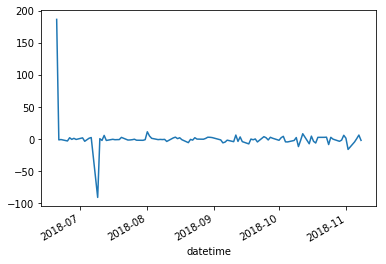

In [15]:
results.resid.plot()

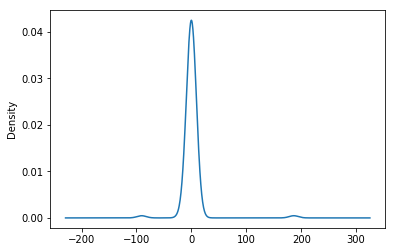

In [16]:
results.resid.plot(kind='kde')

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [29]:
df['forecast'] = results.predict(start= 90, end = 101, dynamic= True)


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [32]:

print(df['forecast'])

datetime
2018-06-20   NaN
2018-06-21   NaN
2018-06-22   NaN
2018-06-25   NaN
2018-06-26   NaN
2018-06-27   NaN
2018-06-28   NaN
2018-06-29   NaN
2018-07-02   NaN
2018-07-03   NaN
2018-07-05   NaN
2018-07-06   NaN
2018-07-09   NaN
2018-07-10   NaN
2018-07-11   NaN
2018-07-12   NaN
2018-07-13   NaN
2018-07-16   NaN
2018-07-17   NaN
2018-07-18   NaN
2018-07-19   NaN
2018-07-20   NaN
2018-07-23   NaN
2018-07-24   NaN
2018-07-25   NaN
2018-07-26   NaN
2018-07-27   NaN
2018-07-30   NaN
2018-07-31   NaN
2018-08-01   NaN
              ..
2018-09-28   NaN
2018-10-01   NaN
2018-10-02   NaN
2018-10-03   NaN
2018-10-04   NaN
2018-10-05   NaN
2018-10-08   NaN
2018-10-09   NaN
2018-10-10   NaN
2018-10-11   NaN
2018-10-12   NaN
2018-10-15   NaN
2018-10-16   NaN
2018-10-17   NaN
2018-10-18   NaN
2018-10-19   NaN
2018-10-22   NaN
2018-10-23   NaN
2018-10-24   NaN
2018-10-25   NaN
2018-10-26   NaN
2018-10-29   NaN
2018-10-30   NaN
2018-10-31   NaN
2018-11-01   NaN
2018-11-02   NaN
2018-11-05   NaN
2018-

In [31]:
df.head()

,Close,forecast
datetime,,
2018-06-20,186.5000,NaN
2018-06-21,185.4600,NaN
2018-06-22,184.9200,NaN
2018-06-25,182.1700,NaN
2018-06-26,184.4300,NaN
